In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Load and visualize the dataset
# Use parenthesis to call the pd.read_csv function
data = pd.read_csv('/content/Mall_Customers.csv')
print(f'Dataset shape: {data.shape}')
print(data.head())

# ... (rest of your code)

Dataset shape: (200, 5)
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


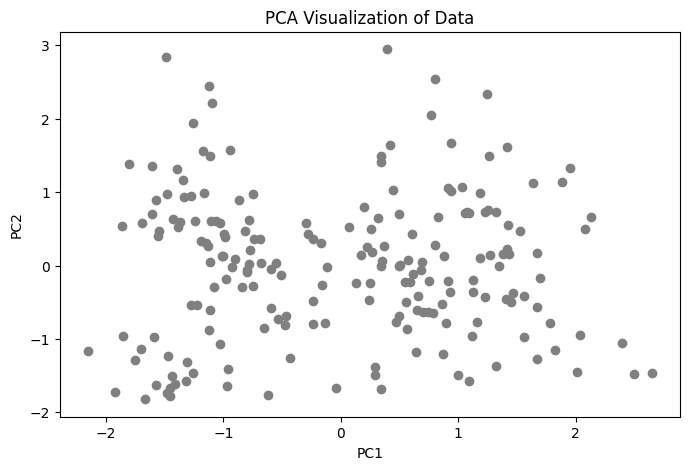

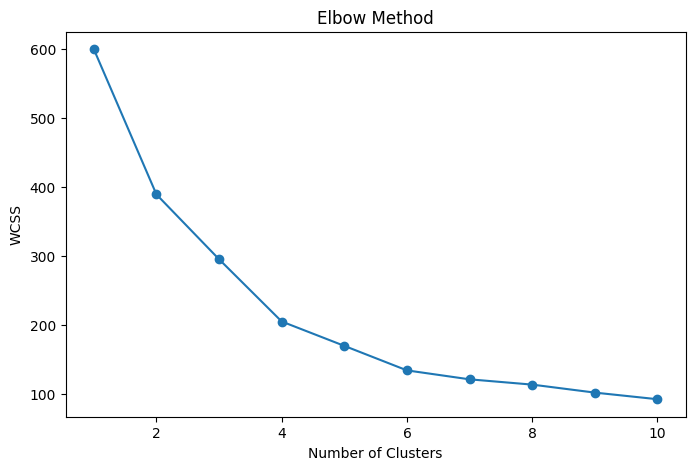

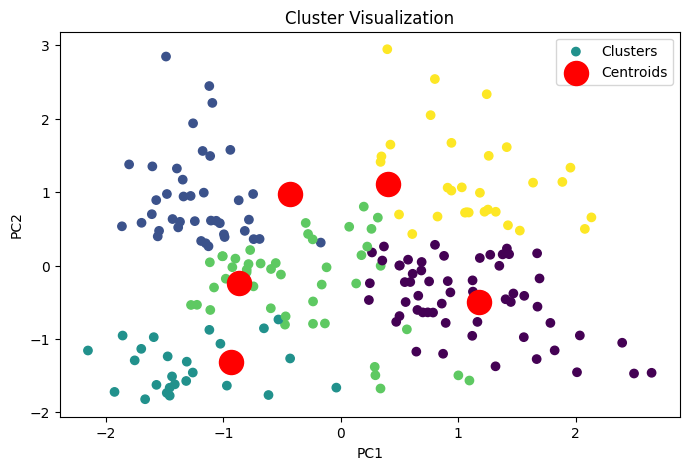

Silhouette Score: 0.40846873777345605


In [7]:
# Data Preprocessing
X = data.iloc[:, [2, 3, 4]].values  # Select only numerical features: Age, Annual Income, Spending Score
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Optional PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='gray', label='Data Points')
plt.title('PCA Visualization of Data')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Elbow Method to find optimal K
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Fit K-Means with optimal K (example: K=5)
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Visualize clusters with color-coding
plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', label='Clusters')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('Cluster Visualization')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

# Evaluate clustering using Silhouette Score
sil_score = silhouette_score(X_scaled, clusters)
print(f'Silhouette Score: {sil_score}')
